In [1]:
import sys
import BNN
import torch
import matplotlib.pyplot as plt
import numpy as np

In [6]:
x = torch.unsqueeze(torch.linspace(-1, 1, 3000), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(1) + 0.002*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

net = BNN.BayesianNN(n_feature=1,n_hidden=2,n_output=1)


samples = net.generate_posteriors_weights(x.data.numpy(),y.data.numpy(),n_iterations=300,N_mcmc_walkers=300,N_mcmc_runs=1000,deps=1e-1)

Number of Model Parameters:  7


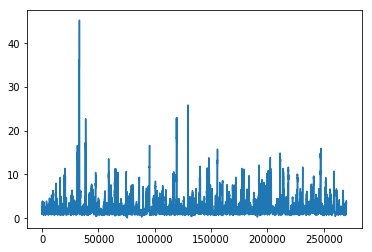

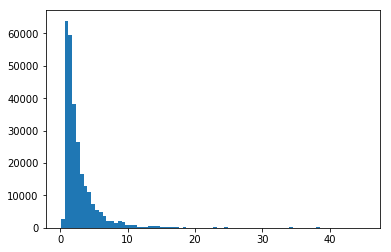

2.80087061689
2.97979491669

tensor([[-0.9940],
        [ 0.7992]])
tensor([ 0.9393, -0.7791])
tensor([[-1.0066, -0.0765]])
tensor([0.9468])
None


In [7]:
s=samples[:,-1]
#plt.hist(s,bins=80)
plt.plot(s)
plt.show()

plt.hist(s,bins=80)
plt.show()


print(s.mean())
print(s.std())
print()
print(net.print_all_parameters())

tensor([[-0.9940],
        [ 0.7992]])
tensor([ 0.9393, -0.7791])
tensor([[-1.0066, -0.0765]])
tensor([0.9468])
1.32175e-06
1.18405e-06


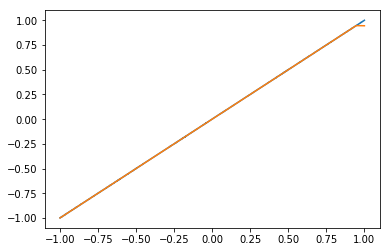

In [8]:
net.print_all_parameters()

plt.plot(x.data.numpy(),y.data.numpy())
plt.plot(x.data.numpy(),net.return_prediction(x).data.numpy())
res = (x.data.numpy()-y.data.numpy())**2

print(res.mean())
print(res.std())